In [76]:
import pandas as pd
import folium as fol
import dash
from dash import html
import seaborn as sns

In [77]:
# Define CONSTANTS for the project
READFILE = "havforsk.csv"
ENCODE = "Windows-1252"

# Define the Oslofjord boundaries
OSLOFJORD_LAT_MIN, OSLOFJORD_LAT_MAX  = 58.5, 60.0
OSLOFJORD_LON_MIN, OSLOFJORD_LON_MAX = 10.0, 11.5

In [78]:
# Read the data from the CSV file
df = pd.read_csv(READFILE, delimiter=";", encoding=ENCODE, engine="python")

# Function to check if a point is within the Oslofjord area
is_within_oslofjord = lambda lat, lon: OSLOFJORD_LAT_MIN <= lat <= OSLOFJORD_LAT_MAX and OSLOFJORD_LON_MIN <= lon <= OSLOFJORD_LON_MAX

# Filter the DataFrame to include only points within the Oslofjord area
df_oslofjord = df[df.apply(lambda row: is_within_oslofjord(row["latitude"], row["longitude"]), axis=1)]



In [79]:
# Create the map centered around the Oslofjord area
map = fol.Map(location=[df_oslofjord["latitude"].mean(), df_oslofjord["longitude"].mean()], zoom_start=8)
# Add markers for each fish within the Oslofjord area
for fish in df_oslofjord.iterrows():
    weight = fish[1]["weight"] if fish[1]["weight"] > 0 else None
    weight_text = "" if weight is None else f"<br>Vekt: {fish[1]['weight']}"
    popup_content = f"Art: {fish[1]['validSpecie']}<br>Amount: {fish[1]['amount']}<br>Lengde: {fish[1]['length']}  {weight_text} <br>Dato: {fish[1]['date']}"
    popup = fol.Popup(popup_content, max_width=250)
    color = "green" if weight is not None else "blue" if fish[1]["amount"] > 0 else "red"
    fol.Marker([fish[1]["latitude"], fish[1]["longitude"]], popup=(popup), icon=fol.Icon(color=color)).add_to(map)
  
map

In [80]:
# Save the map to an HTML file
map.save("map.html")


In [81]:
# Create the Dash app
app = dash.Dash()
# Define the layout of the app
app.layout = html.Div(
    [
        html.H1("Fisk rundt Oslofjorden"),
        # Add an iframe to display the map
        html.Iframe(srcDoc=open("map.html", "r", encoding="utf-8").read(), width="100%", height="600")
    ]
)
# Run the app
app.run_server(debug=True) 

In [82]:

oslofjord = df_oslofjord


<Axes: xlabel='Count', ylabel='category'>

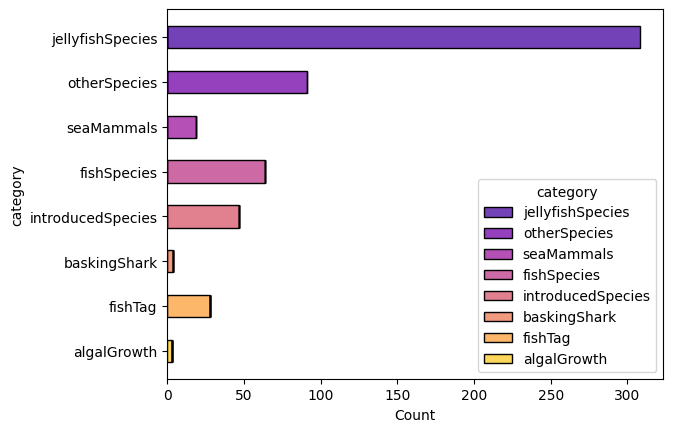

In [83]:
#Plot the amount of observations of unique categories around the oslofjord
sns.histplot(data=oslofjord, y=oslofjord["category"], hue=oslofjord["category"], multiple="stack", shrink=0.5, palette="plasma")

In [84]:
# sns.histplot(data=oslofjord, y=oslofjord["date"], hue=oslofjord["category"], multiple="stack", shrink=0.5, palette="plasma")

<Axes: ylabel='Count'>

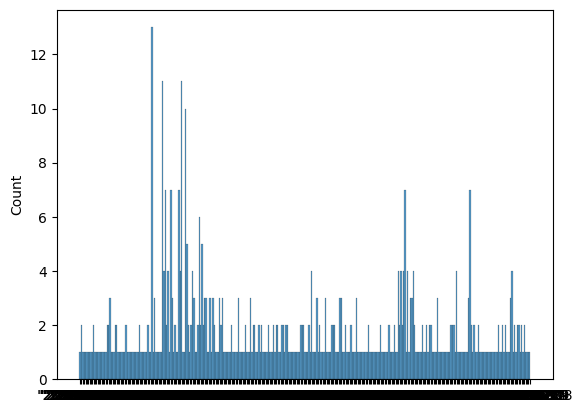